>선형회귀

In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

In [2]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [3]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [4]:
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [5]:
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [6]:
for step in range(1, training_steps + 1):
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print(f'step: {step}, loss: {loss}, W: {W.numpy()}, b: {b.numpy()}')

step: 50, loss: 0.2607315182685852, W: 0.38269200921058655, b: -0.13033437728881836
step: 100, loss: 0.2376706749200821, W: 0.3676943778991699, b: -0.024007882922887802
step: 150, loss: 0.2195858359336853, W: 0.3544130027294159, b: 0.07015103101730347
step: 200, loss: 0.20540323853492737, W: 0.34265148639678955, b: 0.15353474020957947
step: 250, loss: 0.1942809820175171, W: 0.3322359323501587, b: 0.22737635672092438
step: 300, loss: 0.18555857241153717, W: 0.3230122923851013, b: 0.29276788234710693
step: 350, loss: 0.17871828377246857, W: 0.31484416127204895, b: 0.3506762683391571
step: 400, loss: 0.17335394024848938, W: 0.30761075019836426, b: 0.40195783972740173
step: 450, loss: 0.16914711892604828, W: 0.3012050986289978, b: 0.44737106561660767
step: 500, loss: 0.1658480018377304, W: 0.2955324947834015, b: 0.4875873923301697
step: 550, loss: 0.1632608026266098, W: 0.29050904512405396, b: 0.5232013463973999
step: 600, loss: 0.16123180091381073, W: 0.2860604226589203, b: 0.554739952087

In [7]:
import matplotlib.pyplot as plt

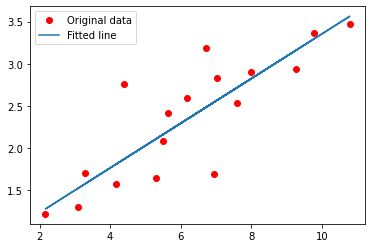

In [8]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()